# Polynomial Regression Example

In [1]:
import sys
sys.path.append('../../pyLearnAlgorithms')
from pyLearnAlgorithms.load_data import LoadData
from pyLearnAlgorithms.graph_view import GraphView
from pyLearnAlgorithms.polynomial_regression import PolynomialRegression
from pyLearnAlgorithms.split_data import SplitData
import numpy as np

In [2]:
dataset = LoadData('../tests/datasets', 'ComponentsAnalysis.txt')
data = dataset.load_txt()

In [3]:
split = SplitData(data)
data_train, data_test, data_val = split.split_train_test_val(0.2, 0.2)
print(data_train.size)
print(data_test.size)
print(data_val.size)

118
38
38


In [4]:
data_train = dataset.convert_numpy_array(data_train)
data_test = dataset.convert_numpy_array(data_test)
data_val = dataset.convert_numpy_array(data_val)
X, y = np.atleast_2d(data_train[:, 0]).T, data_train[:, 1]
Xtest, ytest = np.atleast_2d(data_test[:, 0]).T, data_test[:, 1]
Xval, yval = np.atleast_2d(data_val[:, 0]).T, data_val[:, 1]

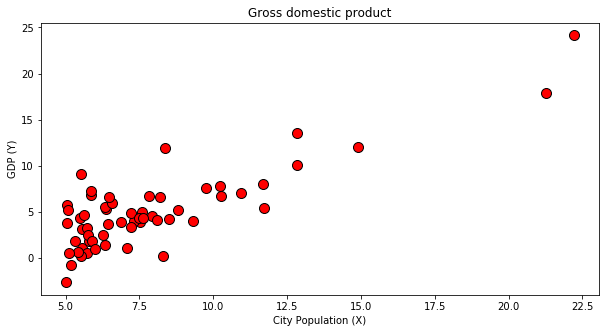

In [5]:
dataset_graph = GraphView(X, y)
dataset_graph.view_data('City Population (X)', 'GDP (Y)', 'Gross domestic product')

In [6]:
regressor = PolynomialRegression(X, y)
X_poly = regressor.polyFeatures(X, 3)
X_poly, mu, sigma = regressor.featureNormalize(X_poly)

In [7]:
Xtest = regressor.prepareExtracts(Xtest, ytest, 3)
Xval = regressor.prepareExtracts(Xval, yval, 3)

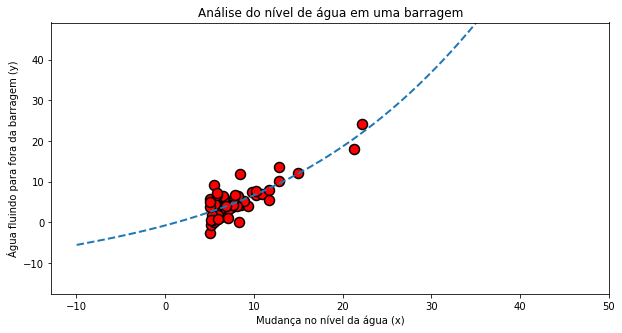

In [8]:
dataset_graph = GraphView(X, y)
dataset_graph.model_poly('Mudança no nível da água (x)',
                         'Água fluindo para fora da barragem (y)', 
                         'Análise do nível de água em uma barragem', 
                         polynomial_degree = 3, 
                         lambda_ = 1, 
                         maxiter = 200)

In [9]:
train_error, val_error = regressor.learningCurve(X_poly, y, Xval, yval, 1)
print('# Training Examples\tTraining Error\t\tCross Validation Error')
for i in range(y.size):
    print('{}\t\t\t{}\t{}'.format(i+1, train_error[i], val_error[i]))

# Training Examples	Training Error		Cross Validation Error
1			4.0634913447534004e-16	27.011749486503874
2			0.07657503584484587	28.280745396913467
3			1.1961711511596058	8.439984569989313
4			1.030377558189066	10.156224091311856
5			0.8248767625399263	10.337980493634904
6			0.7462841214634865	11.514533802589709
7			0.7351098007597483	10.053702645445432
8			0.7650767910535049	6.8615620616153326
9			0.700029060965919	6.837692598983909
10			0.9239202963640092	6.500007139442336
11			1.013077457818147	6.576794360406334
12			1.3426185990261683	7.239444471179634
13			1.4480143902123008	7.396797670774012
14			1.3450865589320804	7.425652131084126
15			1.5049199588268805	7.213566852218125
16			1.4161115294583277	7.191826773054964
17			1.4205694424662245	7.056042136893623
18			1.3566064795889337	7.079026445271775
19			1.6940545090889987	6.293292191960629
20			1.6184176540405084	6.29552034275402
21			1.586427352177719	6.3585984467534615
22			1.5143823058682995	6.361413087646171
23			1.45551498128

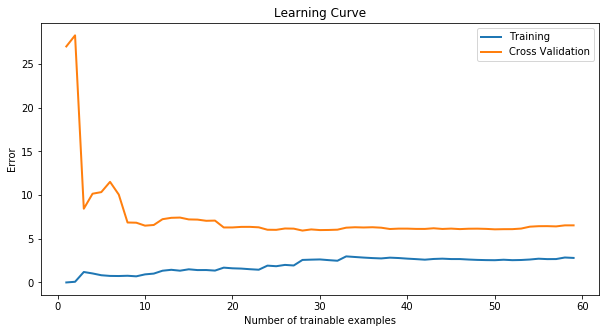

In [10]:
dataset_graph.learning_curve(train_error, val_error)

In [11]:
lambda_vec, error_train, error_val = regressor.validationCurve(X_poly,y,Xval,yval)
print('# Training Examples\tTraining Error\t\tCross Validation Error')
for i in range(y.size):
    print('{}\t\t\t{}\t{}'.format(i+1, train_error[i], val_error[i]))

# Training Examples	Training Error		Cross Validation Error
1			4.0634913447534004e-16	27.011749486503874
2			0.07657503584484587	28.280745396913467
3			1.1961711511596058	8.439984569989313
4			1.030377558189066	10.156224091311856
5			0.8248767625399263	10.337980493634904
6			0.7462841214634865	11.514533802589709
7			0.7351098007597483	10.053702645445432
8			0.7650767910535049	6.8615620616153326
9			0.700029060965919	6.837692598983909
10			0.9239202963640092	6.500007139442336
11			1.013077457818147	6.576794360406334
12			1.3426185990261683	7.239444471179634
13			1.4480143902123008	7.396797670774012
14			1.3450865589320804	7.425652131084126
15			1.5049199588268805	7.213566852218125
16			1.4161115294583277	7.191826773054964
17			1.4205694424662245	7.056042136893623
18			1.3566064795889337	7.079026445271775
19			1.6940545090889987	6.293292191960629
20			1.6184176540405084	6.29552034275402
21			1.586427352177719	6.3585984467534615
22			1.5143823058682995	6.361413087646171
23			1.45551498128

In [12]:
lambda_vec

[0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

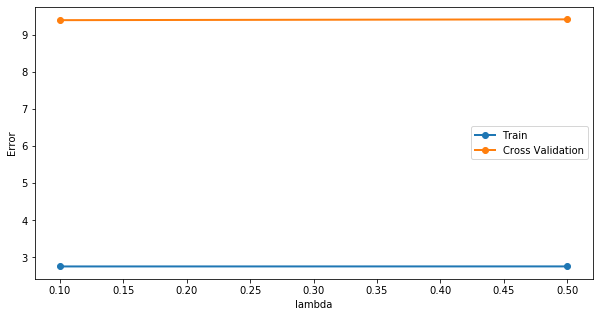

In [13]:
dataset_graph.validation_curve_poly(X_poly, y, Xtest, ytest, lambda_vec = [0.1, 0.5])

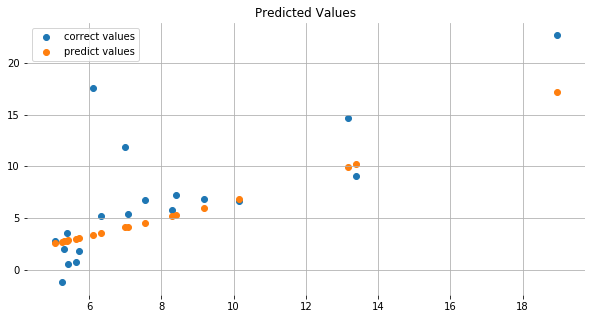

In [14]:
pred = regressor.predict(Xtest, X_poly, y, lambda_ = 1) 
dataset_graph.predicted_values(data_test[:, 0], ytest, pred)

In [15]:
optimize  =regressor.trainPolyReg(3, 1 , 200)
# rename method = trainPolyReg

In [16]:
optimize.x

array([5.06611441, 2.00244033, 1.13894507, 0.57297917])